# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Make Datasets

In [ ]:
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Plot Data

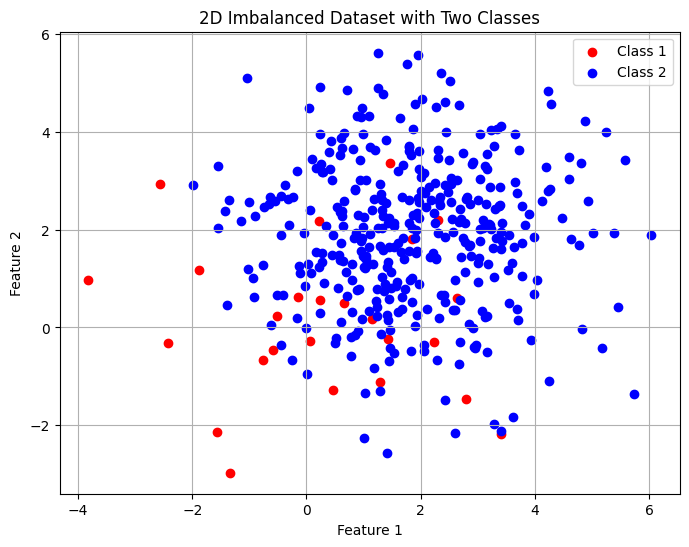

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normally Train Model

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr1.predict(X_test)
y_proba = lr1.predict_proba(X_test)[:, 1]

# print_classification_report

In [ ]:
def print_classification_report(y_test, y_pred, y_proba):
  # Print Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  # Print ROC AUC Score
  print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

  # Print Confusion Matrix
  print("Confusion Matrix:")
  print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

print_classification_report(y_test, y_pred, y_proba)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.96      0.99      0.97        76

    accuracy                           0.95        80
   macro avg       0.73      0.62      0.65        80
weighted avg       0.94      0.95      0.94        80

ROC AUC Score: 0.9473684210526316
Confusion Matrix:
Predicted  0   1
Actual          
0          1   3
1          1  75


# plot_roc_curve

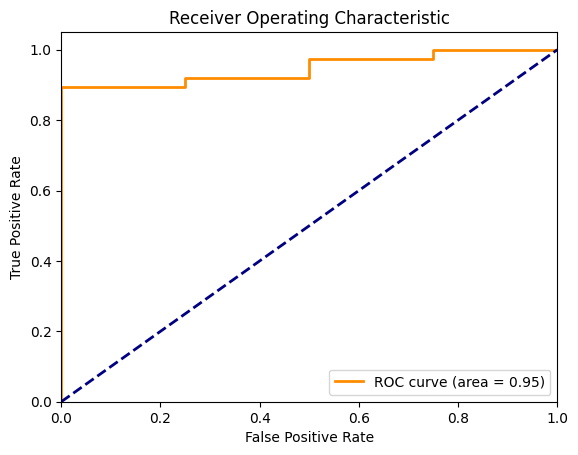

In [ ]:
def plot_roc_curve(y_test, y_proba):
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

plot_roc_curve(y_test, y_proba)

# plot_decision_boundaries

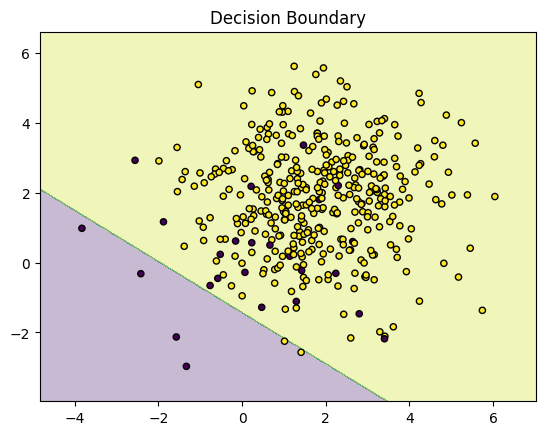

In [ ]:
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, lr1)

# Random Undersampling

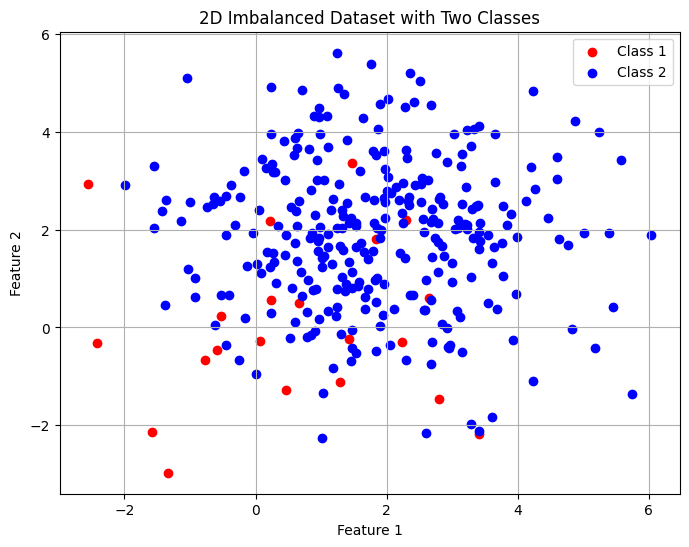

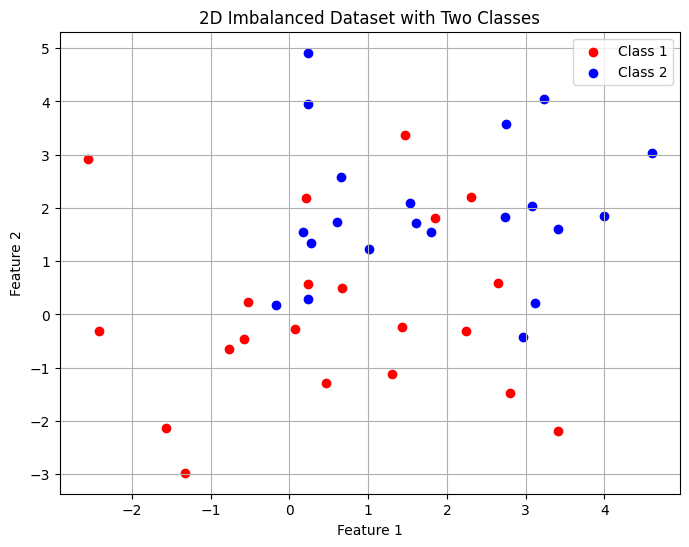

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Random Over Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_resampled.shape, y_resampled.shape

((42, 2), (42,))

## Model

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
y_pred2 = lr2.predict(X_test)
y_proba2 = lr2.predict_proba(X_test)[:, 1]

## Classification Report

In [ ]:
print_classification_report(y_test, y_pred2, y_proba2)

Classification Report:
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80

ROC AUC Score: 0.9375
Confusion Matrix:
Predicted   0   1
Actual           
0           4   0
1          18  58


## Roc Curve Plotting

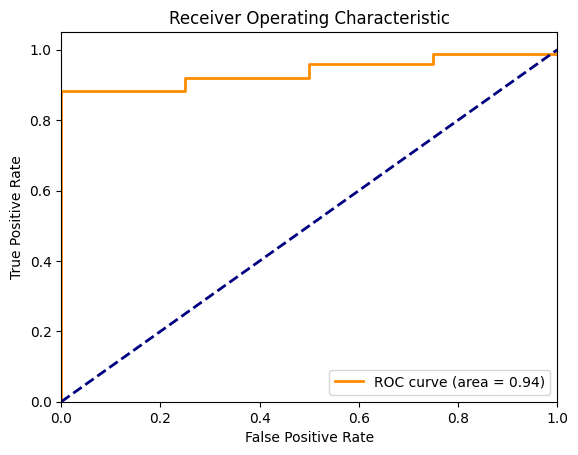

In [ ]:
plot_roc_curve(y_test, y_proba2)

## Plot Decision Boundry

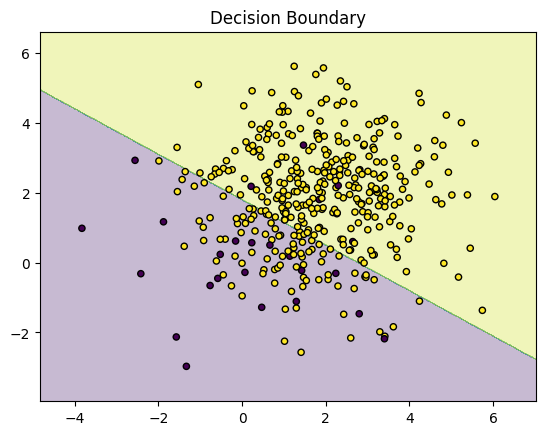

In [ ]:
plot_decision_boundaries(X, y, lr2)

# Random Oversampling

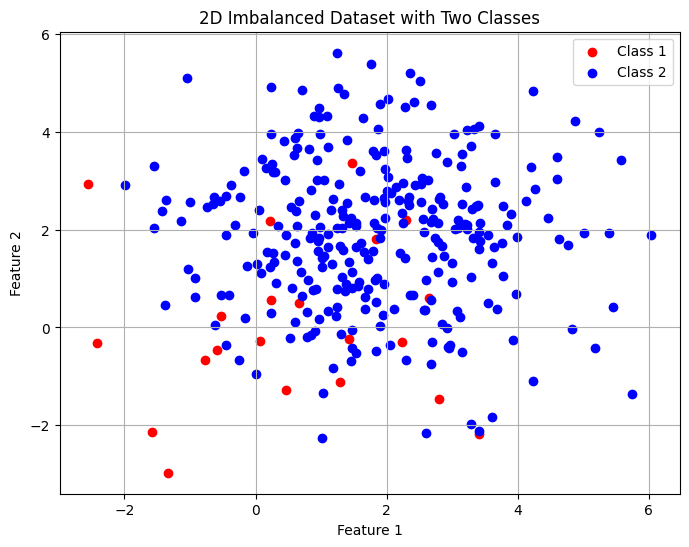

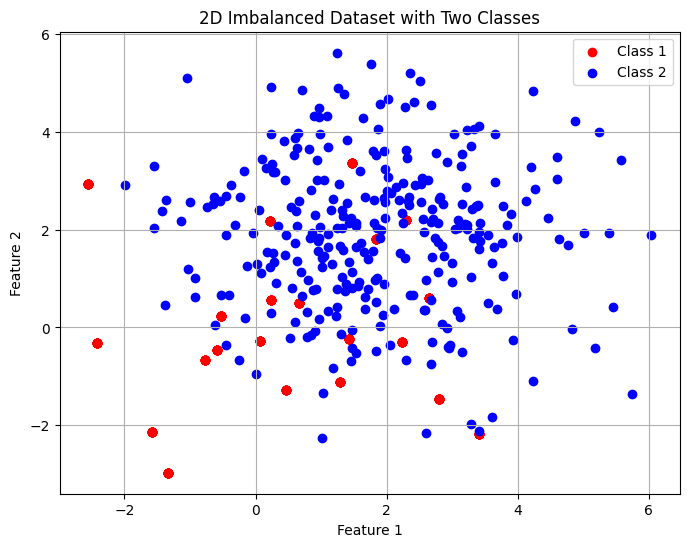

In [ ]:
# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Model

In [ ]:
lr3 = LogisticRegression()
lr3.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
y_pred3 = lr3.predict(X_test)
y_proba3 = lr3.predict_proba(X_test)[:, 1]

## Classification Report

In [ ]:
print_classification_report(y_test, y_pred3, y_proba3)

Classification Report:
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80

ROC AUC Score: 0.950657894736842
Confusion Matrix:
Predicted   0   1
Actual           
0           4   0
1          18  58


## ROC Curve Plotting

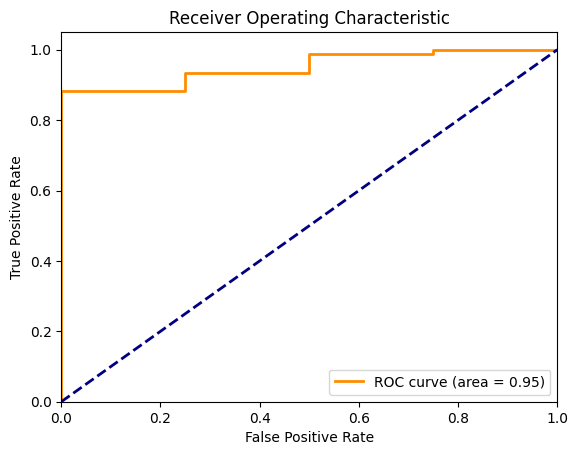

In [ ]:
plot_roc_curve(y_test, y_proba3)

## Plot Decision Boundry

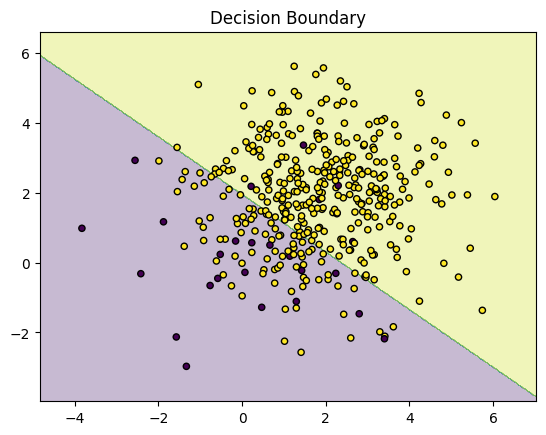

In [ ]:
plot_decision_boundaries(X, y, lr3)

# SMOTE

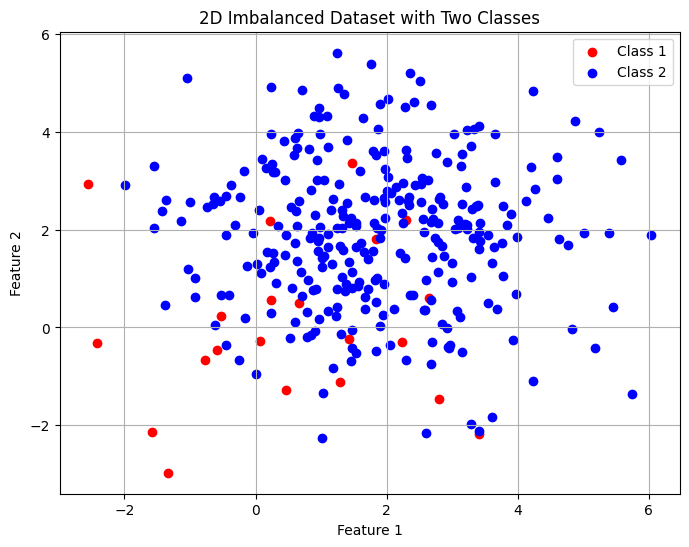

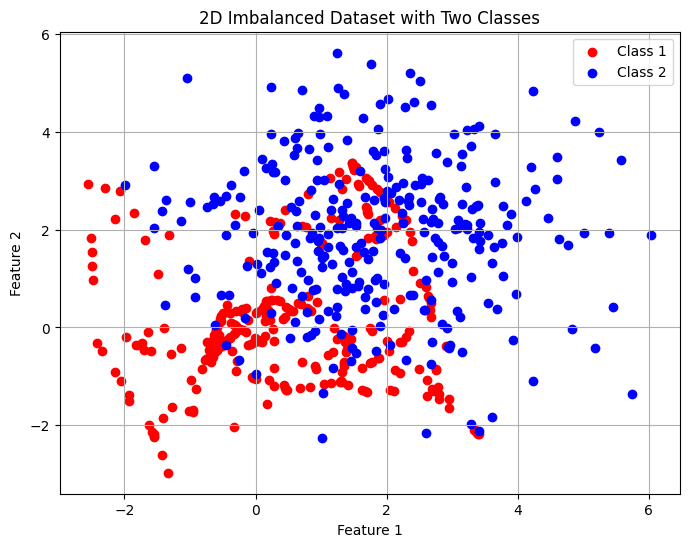

In [ ]:

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Model

In [ ]:
lr4 = LogisticRegression()
lr4.fit(X_resampled_smote, y_resampled_smote)

LogisticRegression()

In [ ]:
y_pred4 = lr4.predict(X_test)
y_proba4 = lr4.predict_proba(X_test)[:, 1]

## Classification Report

In [ ]:
print_classification_report(y_test, y_pred4, y_proba4)

Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.30         4
           1       1.00      0.75      0.86        76

    accuracy                           0.76        80
   macro avg       0.59      0.88      0.58        80
weighted avg       0.96      0.76      0.83        80

ROC AUC Score: 0.950657894736842
Confusion Matrix:
Predicted   0   1
Actual           
0           4   0
1          19  57


## ROC Curve Plotting

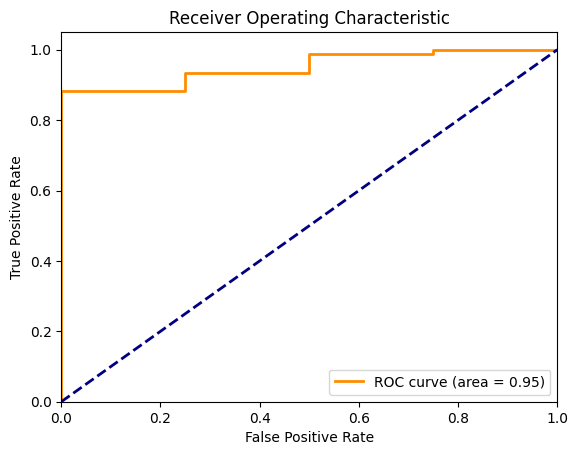

In [ ]:
plot_roc_curve(y_test, y_proba4)

## Plot Decision Boundry

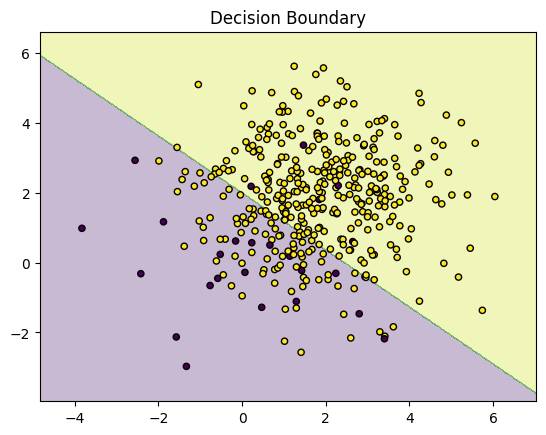

In [ ]:
plot_decision_boundaries(X, y, lr4)

# Balanced Random Forest

## Model

In [ ]:
lr5 = RandomForestClassifier(n_estimators=1000, random_state=42)
lr5.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
y_pred5 = lr5.predict(X_test)
y_proba5 = lr5.predict_proba(X_test)[:, 1]

## ROC Curve Plotting

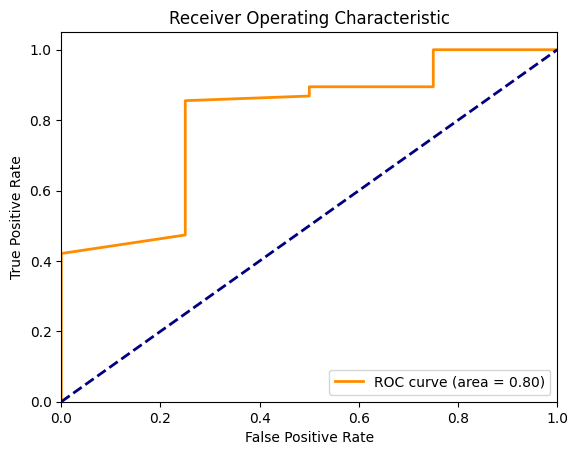

In [ ]:
plot_roc_curve(y_test, y_proba5)

## Plot Decision Boundry

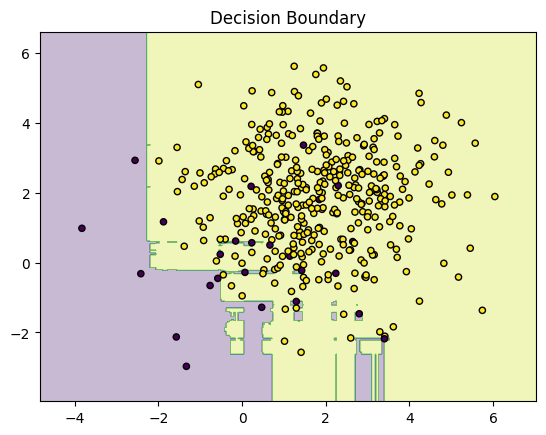

In [ ]:
plot_decision_boundaries(X, y, lr5)

# Class Weights

## Model

In [ ]:
lr6 = LogisticRegression(class_weight={0:50,1:1}, solver='liblinear')
lr6.fit(X_train, y_train)

LogisticRegression(class_weight={0: 50, 1: 1}, solver='liblinear')

In [ ]:
# Predict on the test set
y_pred6 = lr6.predict(X_test)
y_proba6 = lr1.predict_proba(X_test)[:, 1]

## ROC Curve Plotting

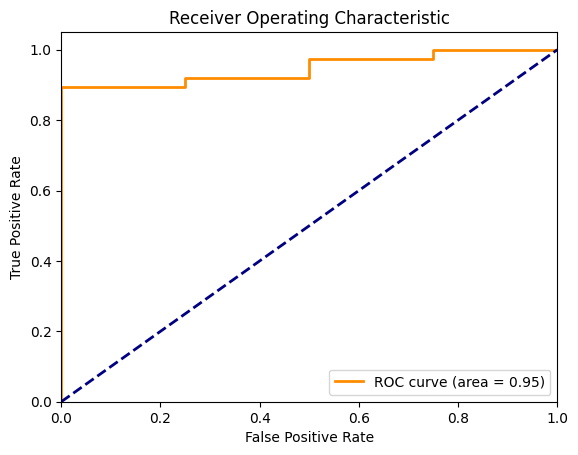

In [ ]:
plot_roc_curve(y_test, y_proba6)

## Plot Decision Boundry

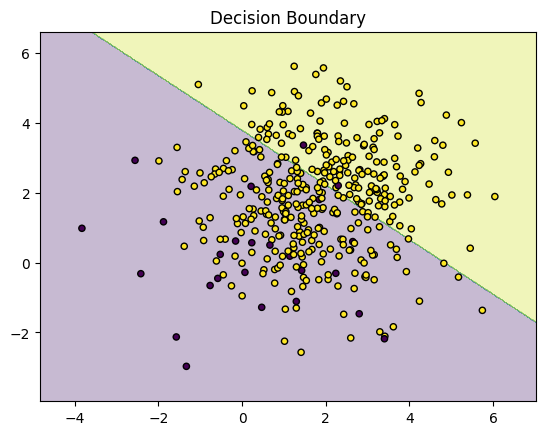

In [ ]:
plot_decision_boundaries(X, y, lr6)

# Custom Loss Function

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.57      0.27         7
           1       0.97      0.83      0.90       113

    accuracy                           0.82       120
   macro avg       0.57      0.70      0.58       120
weighted avg       0.92      0.82      0.86       120

ROC AUC Score: 0.7319848293299621


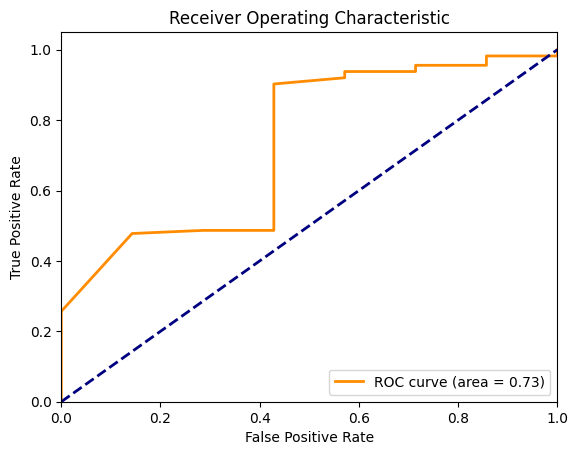

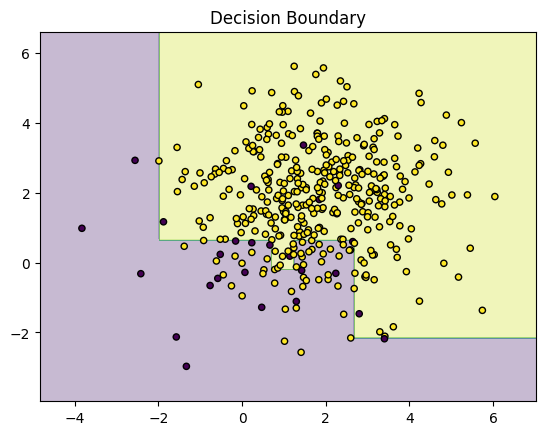

In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))  # Convert to probability

    # Define penalties
    false_positive_penalty = 10
    false_negative_penalty = 1.0

    grad = (preds - labels) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    hess = preds * (1 - preds) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    return grad, hess

# Convert to DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'silent': 1,
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=10, obj=custom_loss)

# Predict test set
y_pred = np.where(bst.predict(dtest) > 0.5, 1, 0)
y_proba = bst.predict(dtest)  # Probability predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.where(Z > 0.5, 1, 0).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, bst)